unsupervised
sentiment models: feed into features
prediction for score and helpfulness. Target: rating/helpfulness

Feature building provides paveway to the model
- cat boost

Sentiment analysis and regression models to analyse amazon food reviews affecting the helpfulness score

Provide insight 

* **Research Question:**
What are the most common user intents related to COVID-19 vaccines that are detected using the Intent dataset?
* **Problem Statement:** Despite the availability of the Intent dataset, there is a need for more advanced text analysis techniques to extract meaningful insights from the dataset regarding user intents related to COVID-19 vaccines.
* **Methods:** By using advanced text analysis techniques such as topic modeling, sentiment analysis, and exploring python packages such as BERTopic, it is possible to extract valuable insights from the Intent dataset regarding common user intents related to COVID-19 vaccines.

In [13]:
import pandas as pd

In [ ]:
testing 

In [14]:
# Load the dataset
df = pd.read_csv('/Users/anna/Desktop/ANLP/Assignments/archive/Reviews.csv')

In [15]:
df.head(10) #view first 10 rows of df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [16]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [17]:
df.count()

Id                        568454
ProductId                 568454
UserId                    568454
ProfileName               568438
HelpfulnessNumerator      568454
HelpfulnessDenominator    568454
Score                     568454
Time                      568454
Summary                   568427
Text                      568454
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [19]:
# Convert Time column to datetime format
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Time'].max()

Timestamp('2012-10-26 00:00:00')

In [20]:
#Get Max and Min of dataset
df.max(axis=0)
df.min(axis=0)

/var/folders/vt/18d8cm9d3yz9mm6xl9gv0v0r0000gn/T/ipykernel_53542/3258264251.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max(axis=0)


Id                                                                   568454
ProductId                                                        B009WVB40S
UserId                                                        AZZZOVIBXHGDR
HelpfulnessNumerator                                                    866
HelpfulnessDenominator                                                  923
Score                                                                     5
Time                                                    2012-10-26 00:00:00
Text                      ~Taste..... I was expecting it to taste pretty...
dtype: object

/var/folders/vt/18d8cm9d3yz9mm6xl9gv0v0r0000gn/T/ipykernel_53542/3734199708.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.min(axis=0)


Id                                                                        1
ProductId                                                        0006641040
UserId                                                   #oc-R103C0QSV1DF5E
HelpfulnessNumerator                                                      0
HelpfulnessDenominator                                                    0
Score                                                                     1
Time                                                    1999-10-08 00:00:00
Text                      ! think I just ruined my dish. open this and p...
dtype: object

In [22]:
#Word Count

def word_count(text): #create function split whitespace characters and calculating length
    wc = len(text.split())
    return wc

In [23]:
df['text_word_count'] = df['Text'].apply(word_count) #apply function to df

In [24]:
df['text_word_count'].describe()

count    568454.000000
mean         80.264023
std          79.455384
min           3.000000
25%          33.000000
50%          56.000000
75%          98.000000
max        3432.000000
Name: text_word_count, dtype: float64

In [25]:
#conda install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Word Count Distribution')

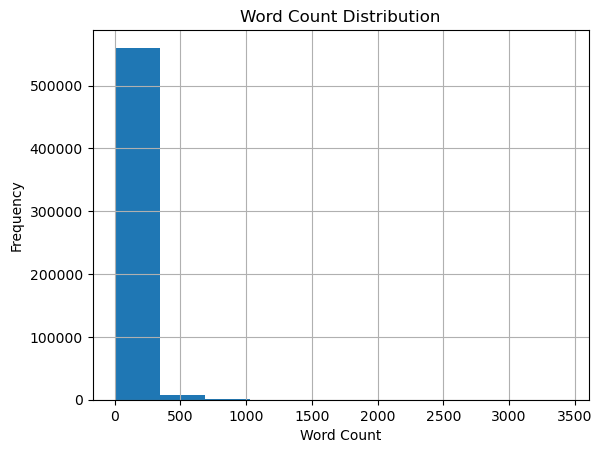

In [26]:
df['text_word_count'].hist(bins=10)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution')

Text(0.5, 1.0, 'Boxplot Score vs Word Count')

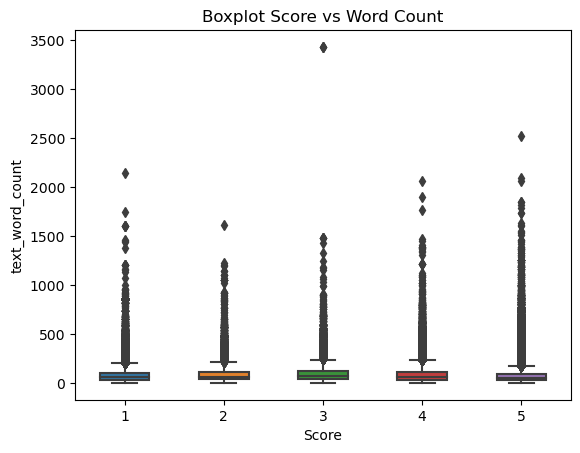

In [27]:
sns.boxplot(x = "Score", 
            y = "text_word_count",
            width=0.5,
            data =df);
plt.title('Boxplot Score vs Word Count')

Text(0.5, 1.0, 'Boxplot Score vs Word Count')

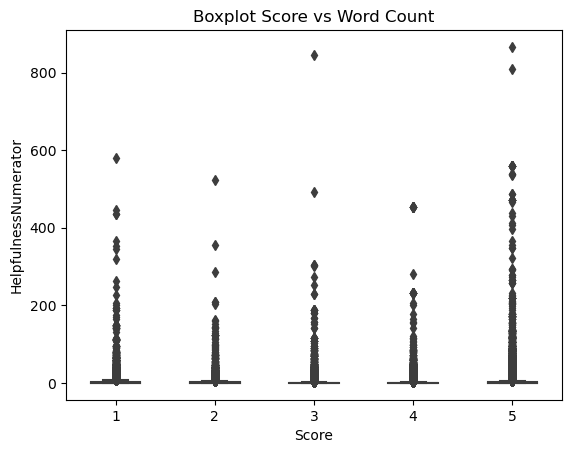

In [28]:
#Distribution of rating scores and average helpfulness
sns.boxplot(x = "Score", 
            y = "HelpfulnessNumerator",
            width=0.5,
            data =df);
plt.title('Boxplot Score vs Word Count')

In [35]:
#Word Frequency
import nltk
from nltk.tokenize import word_tokenize

In [57]:
#Calculate frequencies to determine most common word in the column 'Text'

# Convert series to string
text = df['Text'].to_string()
text = text.lower() #convert to lowercase

#create word tokens
tokenized_words=word_tokenize(text)

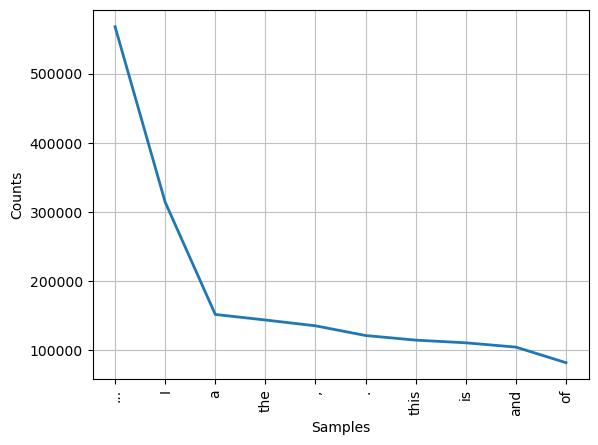

[('...', 568163), ('I', 314342), ('a', 151927), ('the', 143865), (',', 135491), ('.', 121416), ('this', 114764), ('is', 110880), ('and', 104673), ('of', 82148), ('to', 81399), ('This', 70318), ('for', 64601), ('my', 59304), ('have', 57121), ('these', 49776), ('are', 47894), ('was', 45037), ('it', 42670), ('in', 41849)]


In [36]:
all_words=nltk.FreqDist(tokenized_words)
all_words.plot(10);
print(all_words.most_common(20))

In [56]:
#Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100).generate(text)


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Time Distribution')

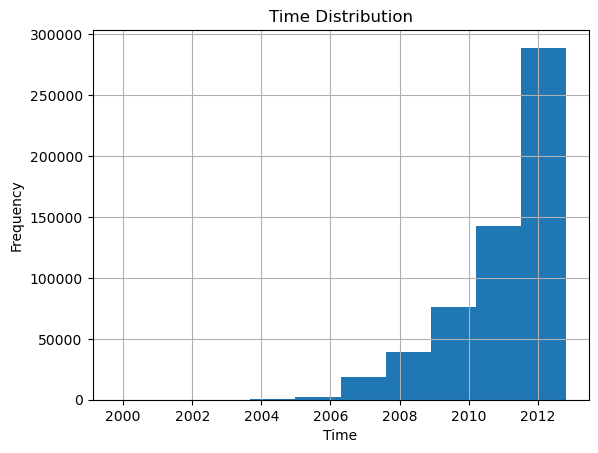

In [29]:
#Time series plot 1999-2012

#timestamp data..?
#what time the reviews were written and if there is a trend in the reviews
#when the reviews were written, time afternoon could be more positive??
#when user are more active

df['Time'].hist(bins=10)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Time Distribution')


In [ ]:
#get average score for each date
#plot average score over time
#what is the average score for each day of the week for each summary?

In [ ]:
#Score Count

In [ ]:
#Helpfulness Score vs Summary Table, get top 10

In [ ]:
#Helpfulness Score vs Summary Table, get bottom top 10

In [ ]:
#give model for feedback to provide
#EDA: K-means to cluster topic model beginning: feature to feed into classification model
#focus on NLP

In [ ]:
#timestamp data..?
#what time the reviews were written and if there is a trend in the reviews
#when the reviews were written, time afternoon could be more positive??
#when user are more active

## Data Preprocessing


In [ ]:
#-stopwords
#lowercase
#Tokenization

#-special characters
#-lemmatizing
#-stewmming



In [38]:
# Data Transformation: Converting article text to lowercase as Python is case-sensitive
df['Text'] = df['Text'].astype(str).str.lower()
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_word_count
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,i have bought several of the vitality canned d...,48
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arrived labeled as jumbo salted peanut...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",this is a confection that has been around a fe...,94


In [39]:
# Data Tokenisation create word tokens
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['Text'].apply(regexp.tokenize)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_word_count,text_token
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,i have bought several of the vitality canned d...,48,"[i, have, bought, several, of, the, vitality, ..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arrived labeled as jumbo salted peanut...,31,"[product, arrived, labeled, as, jumbo, salted,..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",this is a confection that has been around a fe...,94,"[this, is, a, confection, that, has, been, aro..."


In [58]:
# Stopwords: Set up stop words for removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)

# Extend the list with your own custom stopwords
my_stopwords = ["'...", ",", ".", "this", "a", "the", "I", "This", "My", "The", "'s", "These", "n't", "It", "'ve", "We"]
stopwords.extend(my_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/anna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
#Create a new variable to store filtered tokens 
import string
#Create a new variable to store filtered tokens 
filtered_tokens=[]
for w in tokenized_words:    
    if w not in stopwords:
         #add all filtered tokens excluding stopwords in this list below
         filtered_tokens.append(w)

import string
# punctuations
punctuations=list(string.punctuation)
#Add custom punctuations to the list
punctuations.append("...")

#Create another variable to store all clean tokens
filtered_tokens_clean=[]
for i in filtered_tokens:
    if i not in punctuations:
        filtered_tokens_clean.append(i)

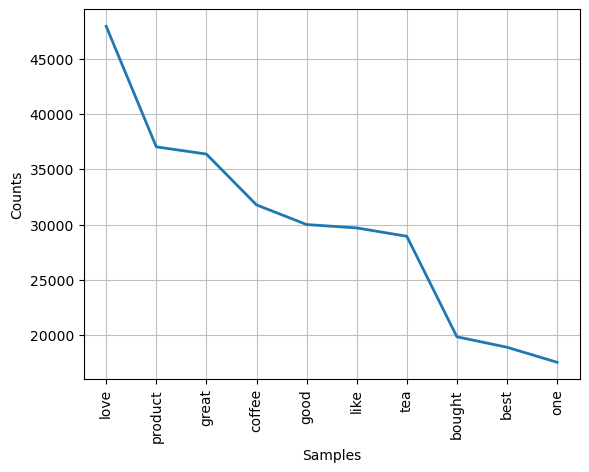

[('love', 47961), ('product', 37050), ('great', 36396), ('coffee', 31796), ('good', 30017), ('like', 29711), ('tea', 28955), ('bought', 19856), ('best', 18912), ('one', 17549), ('really', 17467), ('taste', 16753), ('tried', 16616), ('dog', 14919), ('flavor', 14346), ('first', 14299), ('food', 13379), ('loves', 11661), ('br', 11129), ("'m", 11031)]


In [60]:
all_words=nltk.FreqDist(filtered_tokens_clean)
all_words.plot(10);
print(all_words.most_common(20))

In [61]:
#Sentiment Analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [62]:
#Sentiment Intensity Analyzer
#Initialize an object of SentimentIntensityAnalyzer with name “analyzer”:

from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [64]:
df['polarity'] = df['Text'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_word_count,text_token,polarity
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"these stars are small, so you can give 10-15 o...",66,"[these, stars, are, small, so, you, can, give,...","{'neg': 0.037, 'neu': 0.884, 'pos': 0.078, 'co..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,these are the best treats for training and rew...,35,"[these, are, the, best, treats, for, training,...","{'neg': 0.042, 'neu': 0.513, 'pos': 0.445, 'co..."
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,2012-05-31,Great Honey,"i am very satisfied ,product is as advertised,...",21,"[i, am, very, satisfied, product, is, as, adve...","{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp..."


In [ ]:
# Polarity Scores
df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

In [ ]:
# Change data structure
df = pd.concat(
    [df.drop(['label_idx','label', 'polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

In [ ]:
#EDA
#Wordcloud
#Word count
#Word frequency

In [ ]:
#Test analysis techniques
#Classification
#extraction
#Frequency
#collocation
#Concordance 
#clustering


In [ ]:
#Sentiment analysis with deep learning
#find what is positive and negative
#Modality, negative words, negative sentiment, negative emotion
#Predict the sentiment of a review
#Hugging-face roberta model


In [ ]:
#Logistic regression: Predict if a review is postive or negative based on summary/text
#Test Accuracy
#Confusion matrix


In [ ]:
#DL for text classification - keras
#Baseline model: Overfitting/underfitting
#Deep neural network
#Improve accuracy of model


In [ ]:
#Investigate the causes of negative reviews - what makes a review negative?

In [ ]:
#Predict helpfulness of a review

In [1]:
#Find repeating product reviews from user

In [ ]:
#DL models
#Topis classification with deep learning -> justify models
#Sentiment
#intent

In [ ]:
#DL sentiment analysier
# tag each peice of text as positive or negative or nuetral based on the sneitment
#Test